In [1]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
import math as math

In [24]:
time_period = 20 
gain_history = [] 
loss_history = [] 
avg_gain_values = [] # track avg gains for visualization purposes
avg_loss_values = [] # track avg losses for visualization purposes
rsi_values = [] # track computed RSI values
last_price = 0 # current_price - last_price > 0 => gain. current_price - last_price < 0 => loss.

In [25]:
sbi =  yf.Ticker(str('SBIN')+'.NS').history(period="40d")

In [26]:
for close_price in sbi['Close']:
    if last_price == 0:
        last_price = close_price
    gain_history.append(max(0, close_price - last_price))
    loss_history.append(max(0, last_price - close_price))
#     print((max(0, close_price - last_price)), max(0, last_price - close_price), close_price, last_price)
    last_price = close_price
    
    if len(gain_history) > time_period: # maximum observations is equal to lookback period
        del (gain_history[0])
        del (loss_history[0])
    avg_gain = stats.mean(gain_history) # average gain over lookback period
    avg_loss = stats.mean(loss_history) # average loss over lookback period
    print(avg_gain,avg_loss )
    avg_gain_values.append(avg_gain)
    avg_loss_values.append(avg_loss)
    rs = 0
    if avg_loss > 0: # to avoid division by 0, which is undefined
        rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    rsi_values.append(rsi)

0 0
2.925933837890625 0
4.606099446614583 0
4.597900390625 0
3.6783203125 2.31124267578125
3.9586181640625 1.9260355631510417
3.891880580357143 1.6508876255580358
3.4053955078125 1.9485702514648438
4.649800618489583 1.7320624457465277
4.184820556640625 2.81282958984375
3.80438232421875 3.3439220081676138
3.4873504638671875 3.540618896484375
3.2190927358774037 3.790283203125
3.386073521205357 3.5195486886160716
4.186458333333333 3.284912109375
4.348945617675781 3.0796051025390625
4.098909265854779 2.8984518612132355
6.034908718532986 2.7374267578125
5.717281943873355 3.183455617804276
6.670635986328125 3.0242828369140624
6.670635986328125 3.0365753173828125
6.564907836914062 3.0365753173828125
6.235430908203125 3.0365753173828125
6.006765747070313 4.19957275390625
6.006765747070313 3.911895751953125
6.176419067382812 3.911895751953125
6.444424438476562 3.911895751953125
6.444424438476562 3.830755615234375
5.71417236328125 4.2512054443359375
6.176422119140625 3.62421875
6.2796875 3.19147

In [27]:
sbi['rs_gain'] = pd.Series(avg_gain_values, index = sbi.index)
sbi['rs_loss'] = pd.Series(avg_loss_values, index = sbi.index)
sbi['rsi_values'] = pd.Series(rsi_values, index = sbi.index)

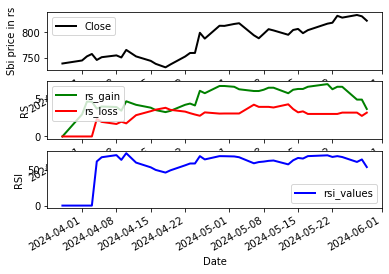

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(311, ylabel='Sbi price in rs')
sbi['Close'].plot(ax=ax1, color='black', lw=2., legend=True)
ax2 = fig.add_subplot(312, ylabel='RS')
sbi['rs_gain'].plot(ax=ax2, color='g', lw=2., legend=True)
sbi['rs_loss'].plot(ax=ax2, color='r', lw=2., legend=True)
ax3 = fig.add_subplot(313, ylabel='RSI')
sbi['rsi_values'].plot(ax=ax3, color='b', lw=2., legend=True)
plt.show()

In [11]:
sbi

,Open,High,Low,Close,Volume,Dividends,Stock Splits,rs_gain,rs_loss,rsi_values
Date,,,,,,,,,,
2024-03-28,725.582229,747.022668,724.746272,739.941406,21705116,0.0,0,3.633539,3.144461,0.000000
2024-04-01,746.530904,748.940508,739.695519,745.793274,9949971,0.0,0,3.633539,3.144461,0.000000
2024-04-02,745.694936,756.070922,740.924892,753.759705,15713063,0.0,0,3.633539,3.144461,0.000000
2024-04-03,752.284476,759.857432,747.612818,758.333008,19136981,0.0,0,3.633539,3.144461,0.000000
2024-04-04,762.217865,762.512905,745.596574,746.776794,15889530,0.0,0,3.633539,3.144461,61.412165
2024-04-05,745.449067,755.038259,740.187269,752.136902,9939620,0.0,0,3.633539,3.144461,67.270197
2024-04-08,753.415466,757.300331,749.235562,755.628357,9797174,0.0,0,3.633539,3.144461,70.215467
2024-04-09,755.775913,759.709940,748.547101,751.596008,7465892,0.0,0,3.633539,3.144461,63.605104
2024-04-10,753.858050,767.823860,751.055079,766.201050,14530669,0.0,0,3.633539,3.144461,72.859611
